# Physician Drug Adoption Prediction

One of the top 5 pharmaceutical companies, Axtratia, headquartered in the US, had launched Axtenna, a drug for the treatment of stage 1 chronic kidney disease, 2.5 years ago. However, some physicians are yet to prescribe it for the first time. A key client stakeholder has reached out to a Decision Sciences Principal in Axtria for help to identify potential physicians who are most likely to start prescribing the drug in the next quarter in order to channelize the marketing efforts more effectively while targeting potential physicians.

We need to create a model that identifies the prospective physicians who have high likelihood to start prescribing the drug in 11th quarter for the first time.

## Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing Physician_activity_over_past_10_quarters dataset 
activity_df = pd.read_excel("C:/Users/neera/Downloads/Physician Drug Adoption Prediction test/Train/Physician_activity_over_past_10_quarters.xlsm")
activity_df.head()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_segment
0,1,201802,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,201803,0,10,11,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,NaN
2,1,201804,1,8,8,0,0,0,0,0,...,15,0,0,0,0,1,1,109,19,NaN
3,1,201901,1,11,24,0,0,0,0,0,...,29,0,0,0,0,1,1,204,18,NaN
4,1,201902,1,15,44,0,0,0,0,0,...,35,0,0,0,0,1,1,180,37,NaN


In [4]:
# Importing Individual_physician_data dataset 
individual_df = pd.read_excel("C:/Users/neera/Downloads/Physician Drug Adoption Prediction test/Train/Individual_physician_data.xlsm")
individual_df.head()

,physician_id,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality
0,1,0.91,0.89,M,58,83,nephrology
1,2,0.21,0.89,M,41,71,other
2,3,1.00,0.58,M,38,71,nephrology
3,4,0.96,0.96,M,42,69,nephrology
4,5,1.00,0.20,M,38,69,nephrology


#### Combining all data files into one consolidated dataframe

In [5]:
# Merging on 'physician_id'
physician = pd.merge(activity_df, individual_df, how='inner', on='physician_id')

## Inspecting the Dataframe

In [6]:
# Let's see the head of our master dataset
physician.head()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_segment,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality
0,1,201802,0,0,0,0,0,0,0,0,...,0,0,0,NaN,0.91,0.89,M,58,83,nephrology
1,1,201803,0,10,11,0,0,1,0,0,...,1,0,0,NaN,0.91,0.89,M,58,83,nephrology
2,1,201804,1,8,8,0,0,0,0,0,...,1,109,19,NaN,0.91,0.89,M,58,83,nephrology
3,1,201901,1,11,24,0,0,0,0,0,...,1,204,18,NaN,0.91,0.89,M,58,83,nephrology
4,1,201902,1,15,44,0,0,0,0,0,...,1,180,37,NaN,0.91,0.89,M,58,83,nephrology


In [7]:
# Let's check the dimensions of the dataframe
physician.shape

(100000, 32)

In [8]:
# let's look at the statistical aspects of the dataframe
physician.describe()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_tenure,physician_age
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5000.500000,201902.500000,0.453850,7.506650,9.702910,0.74199,0.125300,0.136530,0.04013,0.185100,...,0.204750,0.310640,0.842560,0.901500,337.530720,51.999210,0.920926,0.643073,28.058500,60.116900
std,2886.765765,77.078592,0.497868,6.672713,26.254091,3.26853,1.255713,0.405131,0.70429,0.388381,...,0.741912,1.961122,0.364217,0.297991,393.584016,87.135455,0.167215,0.322035,13.326359,14.072598
min,1.000000,201802.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,3.000000,28.000000
25%,2500.750000,201804.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,1.000000,70.000000,2.000000,0.930000,0.350000,18.000000,51.000000
50%,5000.500000,201902.500000,0.000000,6.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,1.000000,236.000000,23.000000,1.000000,0.840000,29.000000,61.000000
75%,7500.250000,202001.000000,1.000000,11.000000,9.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,1.000000,475.000000,66.000000,1.000000,0.920000,38.000000,70.000000
max,10000.000000,202003.000000,1.000000,55.000000,1392.000000,140.00000,116.000000,8.000000,89.00000,1.000000,...,48.000000,140.000000,1.000000,1.000000,9199.000000,3790.000000,1.000000,1.000000,68.000000,94.000000


In [9]:
# Let's see the type of each column
physician.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   physician_id                                         100000 non-null  int64  
 1   year_quarter                                         100000 non-null  int64  
 2   brand_prescribed                                     100000 non-null  int64  
 3   total_representative_visits                          100000 non-null  int64  
 4   total_sample_dropped                                 100000 non-null  int64  
 5   saving_cards_dropped                                 100000 non-null  int64  
 6   vouchers_dropped                                     100000 non-null  int64  
 7   total_seminar_as_attendee                            100000 non-null  int64  
 8   total_seminar_as_speaker                             10

'physician_segment' column has missing values, lets work on that. We can not drop rows with missing values as doing so the data for many physician will be dropped. Hence, we need to fill null values.

## Data Preparation

### Missing Values and Inputing Them

In [10]:
physician['physician_segment'].value_counts()

High         18767
Very High    15856
Medium        9212
Low           5067
Name: physician_segment, dtype: int64

Since 'physician_segment' is a categorical variable we can fill it with mode value of the column

In [11]:
physician['physician_segment'].mode()[0]

'High'

In [12]:
physician['physician_segment'].fillna(physician['physician_segment'].mode()[0], inplace=True)

In [13]:
# Let's check again
physician['physician_segment'].value_counts()

High         69865
Very High    15856
Medium        9212
Low           5067
Name: physician_segment, dtype: int64

In [14]:
# Let's check again for missing values
physician.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   physician_id                                         100000 non-null  int64  
 1   year_quarter                                         100000 non-null  int64  
 2   brand_prescribed                                     100000 non-null  int64  
 3   total_representative_visits                          100000 non-null  int64  
 4   total_sample_dropped                                 100000 non-null  int64  
 5   saving_cards_dropped                                 100000 non-null  int64  
 6   vouchers_dropped                                     100000 non-null  int64  
 7   total_seminar_as_attendee                            100000 non-null  int64  
 8   total_seminar_as_speaker                             10

In [15]:
# Now let's take a look at 'physician_gender' column
physician['physician_gender'].value_counts()

M          56110
F          43850
Unknown       40
Name: physician_gender, dtype: int64

In [16]:
# Since we do not have names for physicians hence, we need to replace 'Unknown' with mode of the column
physician['physician_gender'].replace('Unknown', physician['physician_gender'].mode()[0], inplace=True)
physician['physician_gender'].value_counts()

M    56150
F    43850
Name: physician_gender, dtype: int64

### Separating 'year_quarter' to year & quarter

In [17]:
physician['year_quarter'].value_counts()

202001    10000
202003    10000
202002    10000
201804    10000
201803    10000
201802    10000
201904    10000
201901    10000
201903    10000
201902    10000
Name: year_quarter, dtype: int64

In [18]:
# Since first four digits are year and rest are quarter
physician['year_quarter'] = physician['year_quarter'].astype('str')

def year(year_quarter):
    return year_quarter[:4]
    
def quarter(year_quarter):
    return year_quarter[4:]

In [19]:
physician['year'] = physician['year_quarter'].apply(year)
physician['quarter'] = physician['year_quarter'].apply(quarter)
physician.head()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,new_prescriptions,physician_segment,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,year,quarter
0,1,201802,0,0,0,0,0,0,0,0,...,0,High,0.91,0.89,M,58,83,nephrology,2018,02
1,1,201803,0,10,11,0,0,1,0,0,...,0,High,0.91,0.89,M,58,83,nephrology,2018,03
2,1,201804,1,8,8,0,0,0,0,0,...,19,High,0.91,0.89,M,58,83,nephrology,2018,04
3,1,201901,1,11,24,0,0,0,0,0,...,18,High,0.91,0.89,M,58,83,nephrology,2019,01
4,1,201902,1,15,44,0,0,0,0,0,...,37,High,0.91,0.89,M,58,83,nephrology,2019,02


In [20]:
# Now we can drop 'year_quarter' column
physician.drop('year_quarter', axis=1, inplace=True)
physician.head()

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,...,new_prescriptions,physician_segment,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,year,quarter
0,1,0,0,0,0,0,0,0,0,1,...,0,High,0.91,0.89,M,58,83,nephrology,2018,02
1,1,0,10,11,0,0,1,0,0,1,...,0,High,0.91,0.89,M,58,83,nephrology,2018,03
2,1,1,8,8,0,0,0,0,0,1,...,19,High,0.91,0.89,M,58,83,nephrology,2018,04
3,1,1,11,24,0,0,0,0,0,1,...,18,High,0.91,0.89,M,58,83,nephrology,2019,01
4,1,1,15,44,0,0,0,0,0,1,...,37,High,0.91,0.89,M,58,83,nephrology,2019,02


In [21]:
physician.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   physician_id                                         100000 non-null  int64  
 1   brand_prescribed                                     100000 non-null  int64  
 2   total_representative_visits                          100000 non-null  int64  
 3   total_sample_dropped                                 100000 non-null  int64  
 4   saving_cards_dropped                                 100000 non-null  int64  
 5   vouchers_dropped                                     100000 non-null  int64  
 6   total_seminar_as_attendee                            100000 non-null  int64  
 7   total_seminar_as_speaker                             100000 non-null  int64  
 8   physician_hospital_affiliation                       10

## Creating dummy variables

### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [22]:
# Creating dummy variables for the categorical variables and dropping the first one.
dummy = pd.get_dummies(physician[['physician_segment', 'physician_gender', 'physician_speciality', 'year', 'quarter']], drop_first=True)
dummy

,physician_segment_Low,physician_segment_Medium,physician_segment_Very High,physician_gender_M,physician_speciality_other,physician_speciality_urology,year_2019,year_2020,quarter_02,quarter_03,quarter_04
0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1,0,0,0,0,1,0,0,1,0
99996,0,1,0,0,0,0,1,0,0,0,1
99997,0,1,0,0,0,0,0,1,0,0,0
99998,0,1,0,0,0,0,0,1,1,0,0


In [23]:
# Adding the results to the master dataframe and dropping original variables
physician = pd.concat([physician, dummy], axis=1)
physician = physician.drop(['physician_segment', 'physician_gender', 'physician_speciality', 'year', 'quarter'], 1)

In [24]:
physician.head()

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,...,physician_segment_Medium,physician_segment_Very High,physician_gender_M,physician_speciality_other,physician_speciality_urology,year_2019,year_2020,quarter_02,quarter_03,quarter_04
0,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,1,0,10,11,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,1,8,8,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,1,11,24,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,1,1,15,44,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0


### Checking for Outliers

In [25]:
# Retrieving numerical columns
numericals = physician.describe().columns
numericals

Index(['physician_id', 'brand_prescribed', 'total_representative_visits',
       'total_sample_dropped', 'saving_cards_dropped', 'vouchers_dropped',
       'total_seminar_as_attendee', 'total_seminar_as_speaker',
       'physician_hospital_affiliation', 'physician_in_group_practice',
       'total_prescriptions_for_indication1',
       'total_prescriptions_for_indication2',
       'total_prescriptions_for_indication3',
       'total_patient_with_commercial_insurance_plan',
       'total_patient_with_medicare_insurance_plan',
       'total_patient_with_medicaid_insurance_plan', 'brand_web_impressions',
       'brand_ehr_impressions', 'brand_enews_impressions',
       'brand_mobile_impressions', 'brand_organic_web_visits',
       'brand_paidsearch_visits', 'total_competitor_prescription',
       'new_prescriptions', 'urban_population_perc_in_physician_locality',
       'percent_population_with_health_insurance_in_last10q',
       'physician_tenure', 'physician_age', 'physician_segment_Lo

In [26]:
# Checking for outliers in the continuous variables
physician[numericals].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,...,physician_segment_Medium,physician_segment_Very High,physician_gender_M,physician_speciality_other,physician_speciality_urology,year_2019,year_2020,quarter_02,quarter_03,quarter_04
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0000,100000.00000,100000.00000,100000.00000,100000.000000
mean,5000.500000,0.453850,7.506650,9.702910,0.74199,0.125300,0.136530,0.04013,0.185100,0.958200,...,0.092120,0.158560,0.561500,0.162400,0.060800,0.4000,0.30000,0.30000,0.30000,0.200000
std,2886.765765,0.497868,6.672713,26.254091,3.26853,1.255713,0.405131,0.70429,0.388381,0.200133,...,0.289197,0.365267,0.496206,0.368819,0.238964,0.4899,0.45826,0.45826,0.45826,0.400002
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000
25%,2500.750000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000
50%,5000.500000,0.000000,6.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000
75%,7500.250000,1.000000,11.000000,9.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.0000,1.00000,1.00000,1.00000,0.000000
90%,9000.100000,1.000000,17.000000,25.000000,2.00000,0.000000,1.000000,0.00000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.0000,1.00000,1.00000,1.00000,1.000000
95%,9500.050000,1.000000,20.000000,44.000000,5.00000,0.000000,1.000000,0.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.00000,1.00000,1.00000,1.000000
99%,9900.010000,1.000000,28.000000,116.000000,14.00000,4.000000,2.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.00000,1.00000,1.00000,1.000000


Does not look like these variables have outliers as they are increasing gradually, let's confirm it using scatter plot.

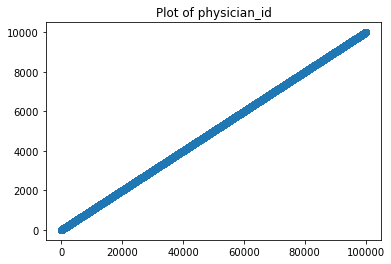

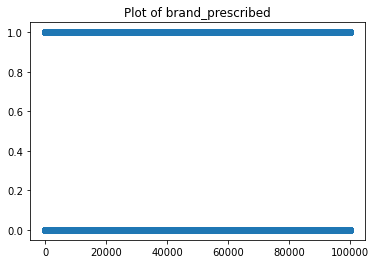

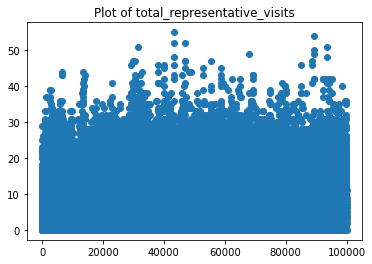

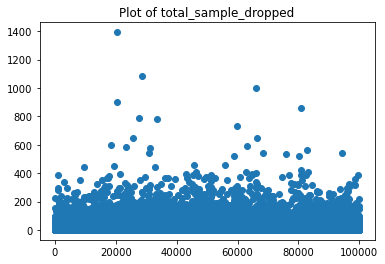

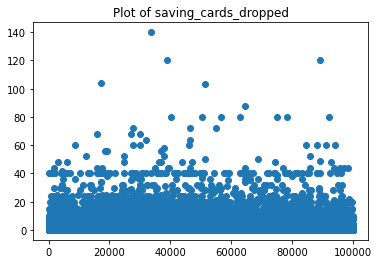

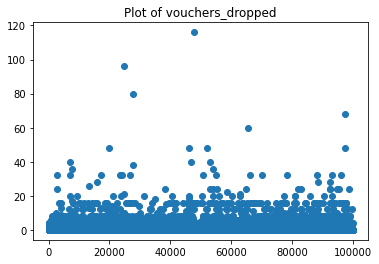

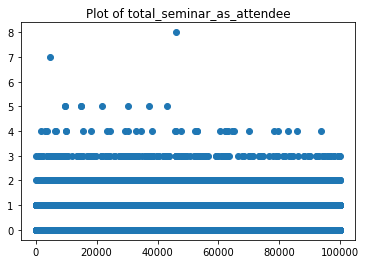

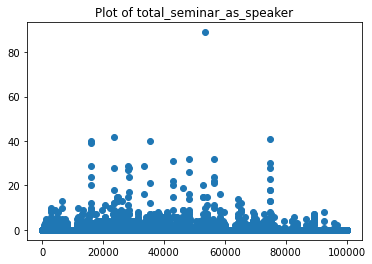

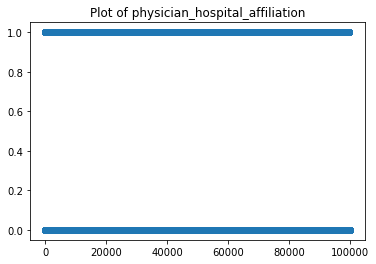

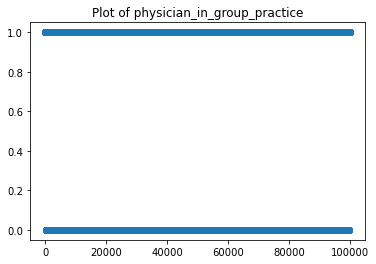

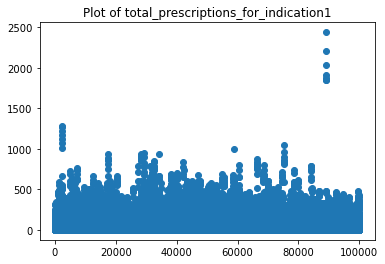

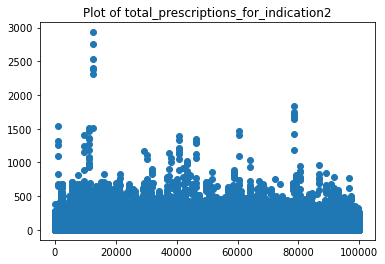

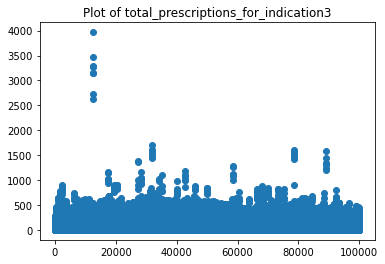

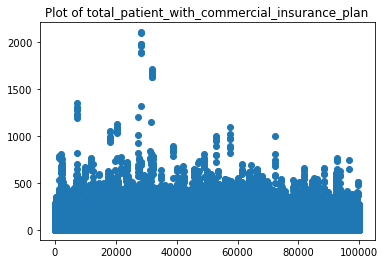

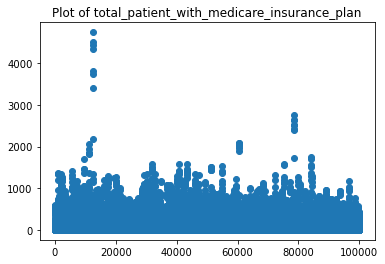

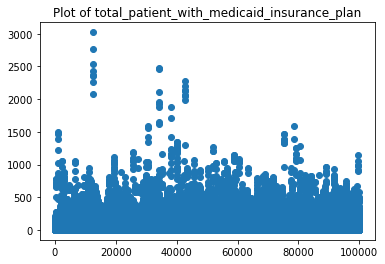

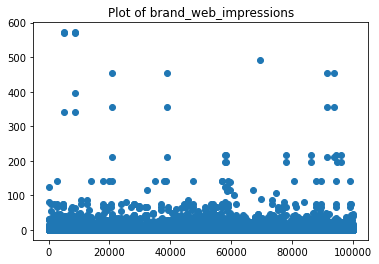

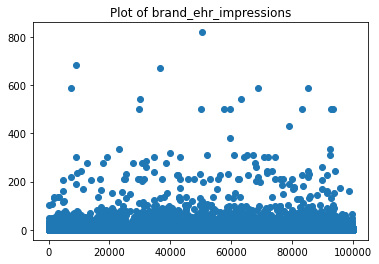

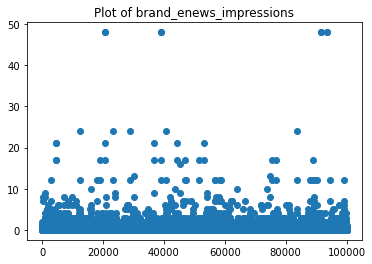

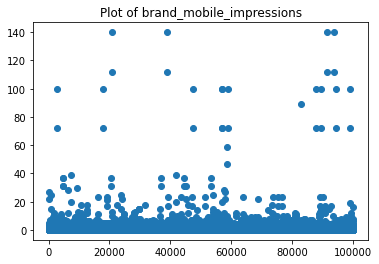

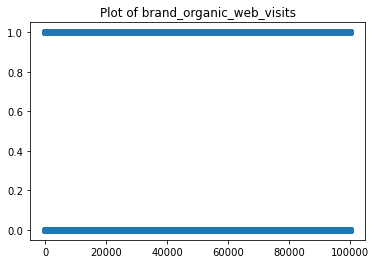

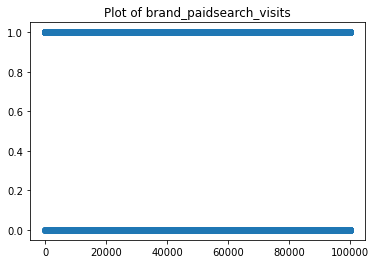

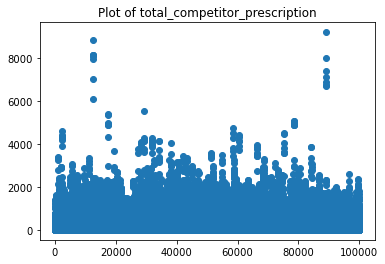

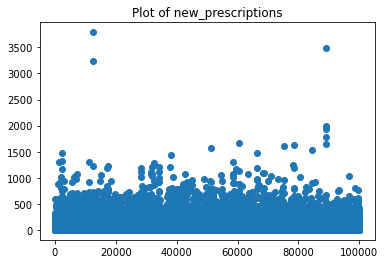

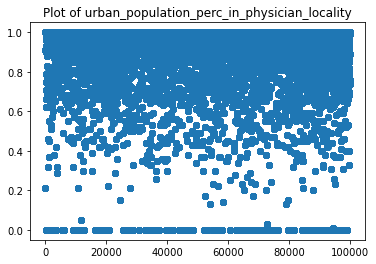

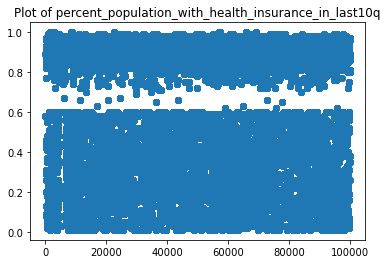

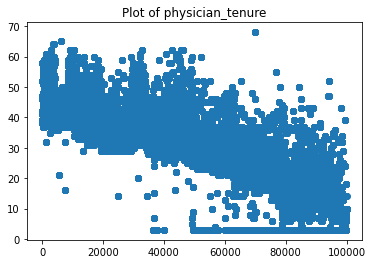

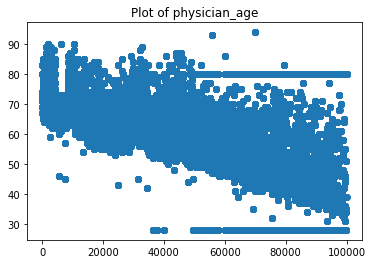

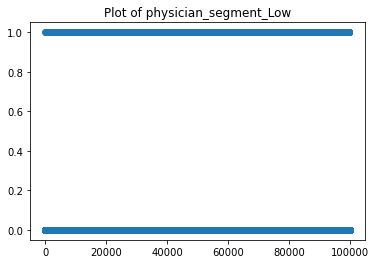

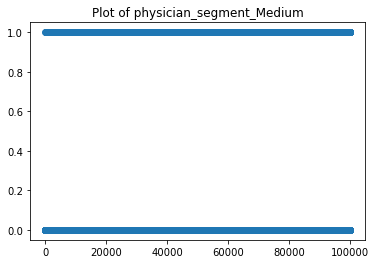

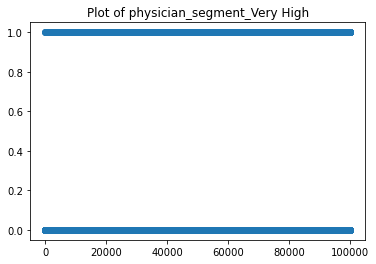

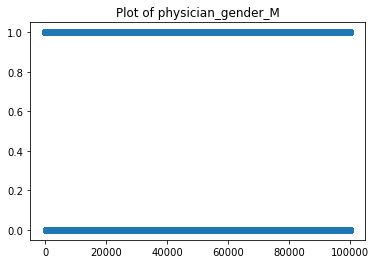

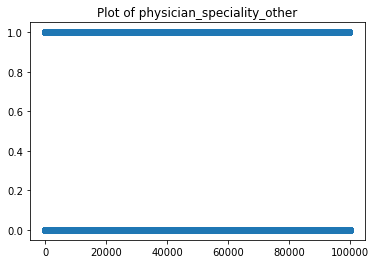

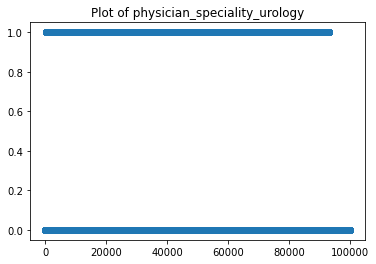

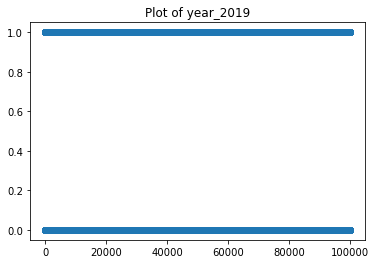

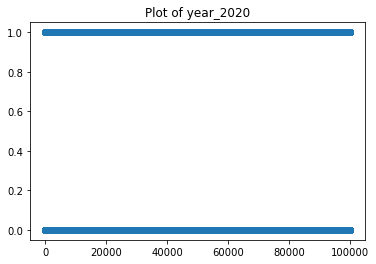

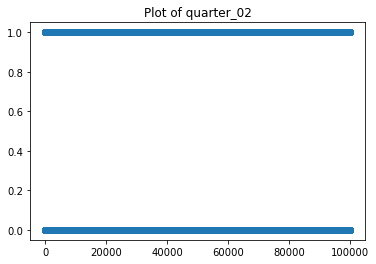

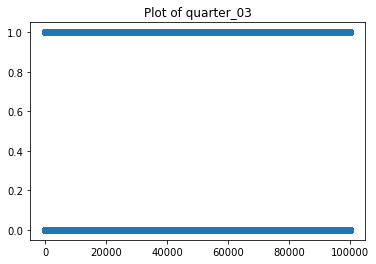

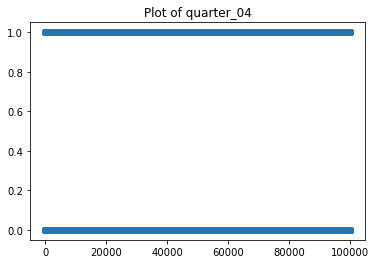

In [27]:
for column in numericals:
    plt.scatter(physician.index, physician[column])
    plt.title("Plot of "+column)
    plt.show()

By observing above scatter plots, we can see that there are a few outliers but they will not affect our regression as they are not that far. Hence, we can leave them as it is.

## Test-Train Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Putting feature variable to X
X = physician.drop(['physician_id','brand_prescribed'], axis=1)
X.head()

,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,...,physician_segment_Medium,physician_segment_Very High,physician_gender_M,physician_speciality_other,physician_speciality_urology,year_2019,year_2020,quarter_02,quarter_03,quarter_04
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,10,11,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,8,8,0,0,0,0,0,1,24,13,...,0,0,1,0,0,0,0,0,0,1
3,11,24,0,0,0,0,0,1,50,26,...,0,0,1,0,0,1,0,0,0,0
4,15,44,0,0,0,0,0,1,49,18,...,0,0,1,0,0,1,0,1,0,0


In [30]:
# Putting response variable to y
y = physician['brand_prescribed']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: brand_prescribed, dtype: int64

In [31]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

X_train[['total_representative_visits','total_sample_dropped','saving_cards_dropped', 'vouchers_dropped', 'total_seminar_as_attendee', 'total_seminar_as_speaker', 'total_prescriptions_for_indication1', 'total_prescriptions_for_indication2', 'total_prescriptions_for_indication3', 'total_patient_with_commercial_insurance_plan', 'total_patient_with_medicare_insurance_plan', 'total_patient_with_medicaid_insurance_plan', 'brand_web_impressions', 'brand_ehr_impressions', 'brand_enews_impressions', 'brand_mobile_impressions', 'brand_organic_web_visits', 'brand_paidsearch_visits', 'total_competitor_prescription', 'new_prescriptions', 'urban_population_perc_in_physician_locality', 'percent_population_with_health_insurance_in_last10q', 
         'physician_tenure', 'physician_age']] = scaler.fit_transform(X_train[['total_representative_visits','total_sample_dropped','saving_cards_dropped', 'vouchers_dropped', 'total_seminar_as_attendee', 'total_seminar_as_speaker', 'total_prescriptions_for_indication1', 'total_prescriptions_for_indication2', 'total_prescriptions_for_indication3', 'total_patient_with_commercial_insurance_plan', 'total_patient_with_medicare_insurance_plan', 'total_patient_with_medicaid_insurance_plan', 'brand_web_impressions', 'brand_ehr_impressions', 'brand_enews_impressions', 'brand_mobile_impressions', 'brand_organic_web_visits', 'brand_paidsearch_visits', 'total_competitor_prescription', 'new_prescriptions', 'urban_population_perc_in_physician_locality', 'percent_population_with_health_insurance_in_last10q', 'physician_tenure', 'physician_age']])

X_train.head()

,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,...,physician_segment_Medium,physician_segment_Very High,physician_gender_M,physician_speciality_other,physician_speciality_urology,year_2019,year_2020,quarter_02,quarter_03,quarter_04
78763,1.727322,0.772273,-0.22451,-0.097804,-0.33553,-0.057683,0,1,0.447605,-0.197531,...,0,0,0,0,0,1,0,0,0,0
71947,-0.824687,-0.138660,-0.22451,-0.097804,-0.33553,-0.057683,0,1,1.589438,0.533086,...,0,0,1,0,0,0,1,0,0,0
21641,0.676495,-0.138660,-0.22451,-0.097804,-0.33553,-0.057683,0,1,-0.906115,-0.562840,...,0,0,1,1,0,0,0,0,1,0
61078,2.177677,-0.252527,-0.22451,-0.097804,-0.33553,-0.057683,0,1,-0.188055,-0.315373,...,0,0,1,0,0,0,1,1,0,0
14736,-1.124924,-0.366394,-0.22451,-0.097804,-0.33553,-0.057683,0,1,-0.364627,-0.386078,...,0,0,1,0,0,1,0,0,0,1


In [34]:
### Checking the Preciption Rate
preciption = (sum(physician['brand_prescribed'])/len(physician['brand_prescribed'].index))*100
preciption

45.385

We have almost 45% Presciption rate (i.e. 45% physicians prescribe the brand)

## Looking at Correlations

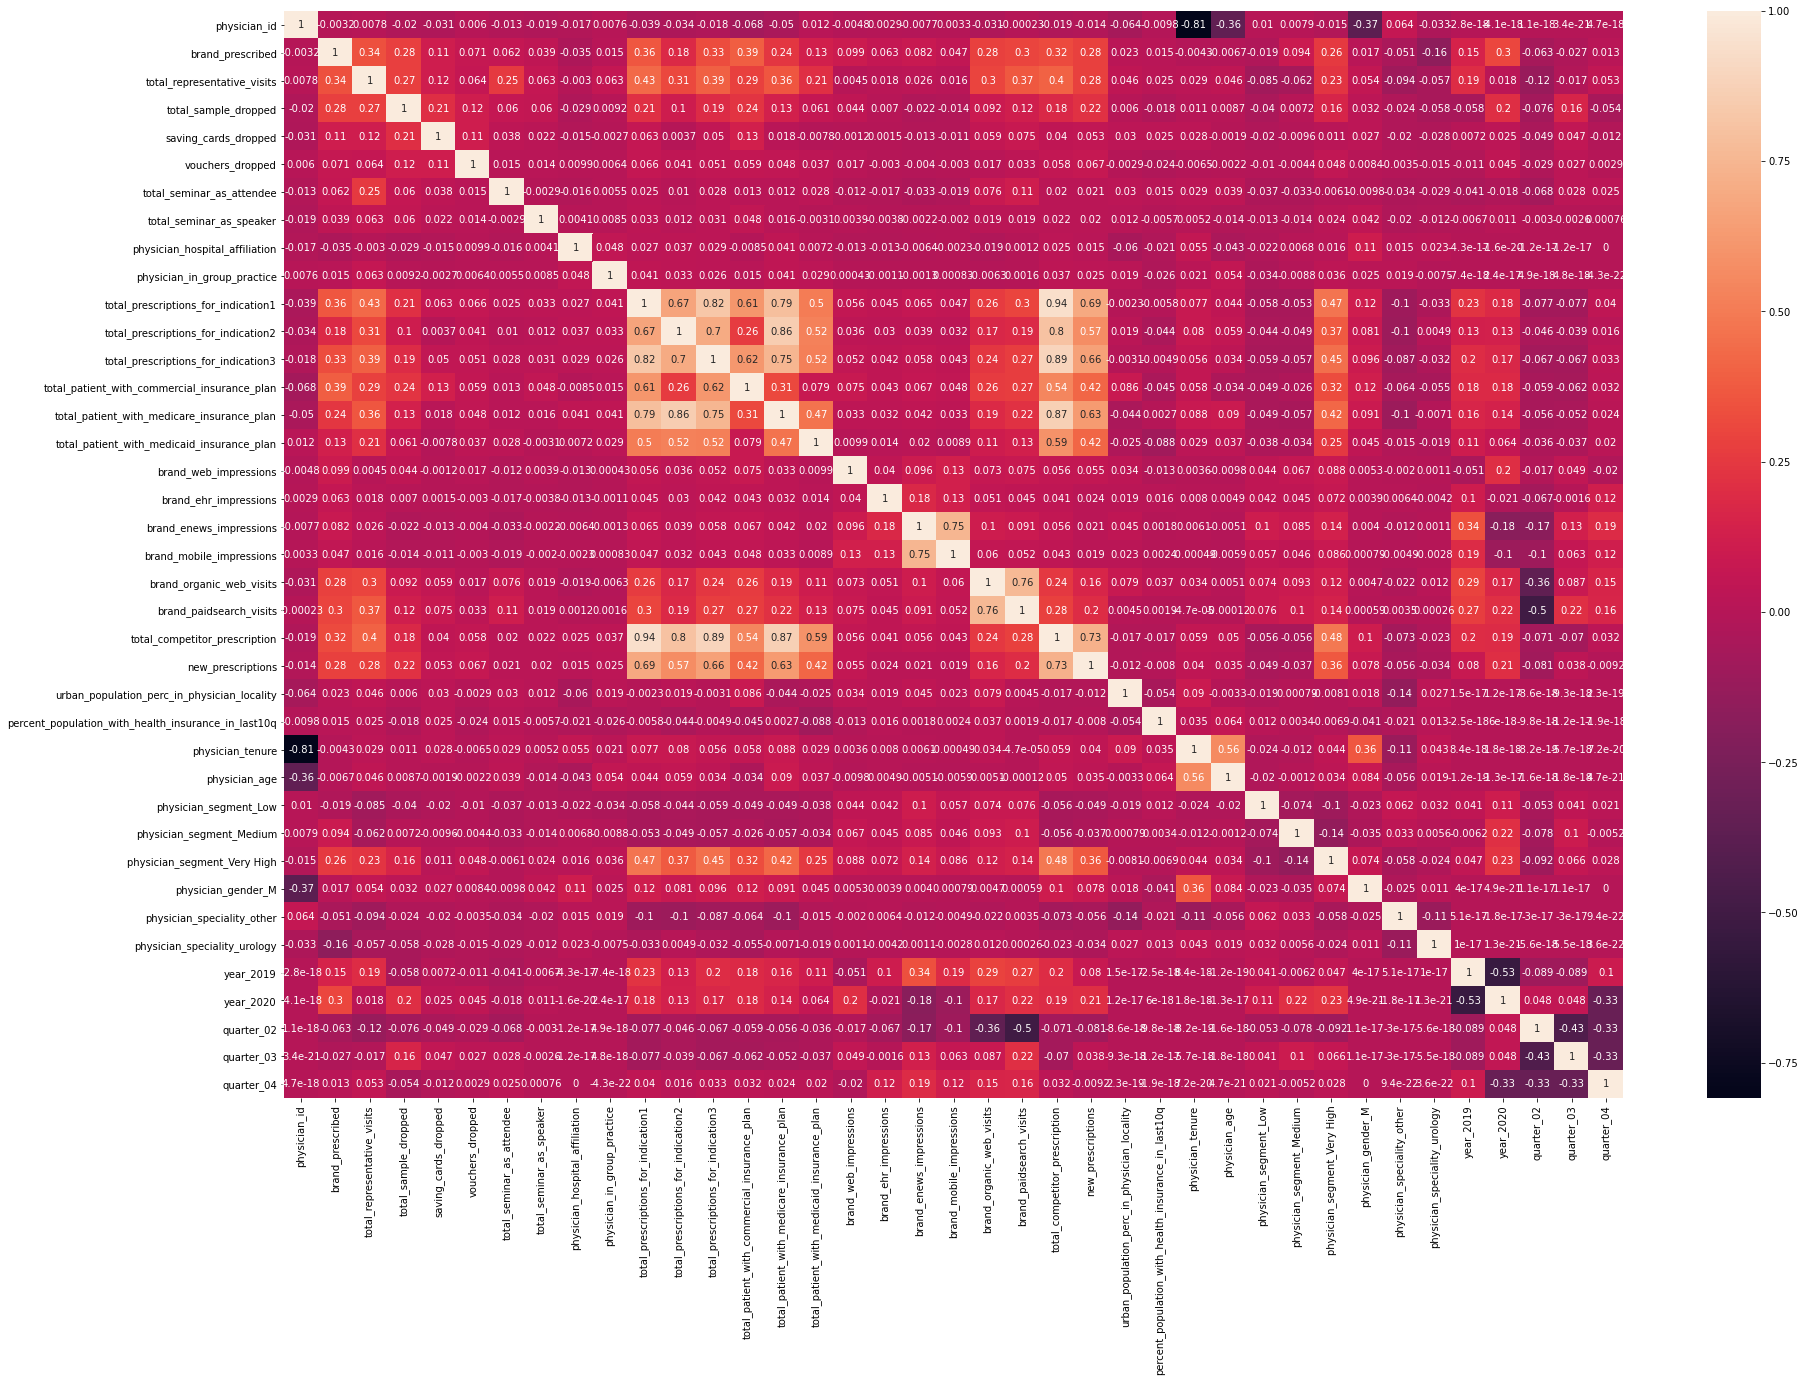

In [35]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))
sns.heatmap(physician.corr(),annot = True)
plt.show()

Since there are no correlated dummy variables, we can proceed for Model Building

## Model Building

Let's try Our First Training Model with all the features

In [36]:
import statsmodels.api as sm

In [37]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       brand_prescribed   No. Observations:                70000
Model:                            GLM   Df Residuals:                    69962
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 14 Mar 2021   Deviance:                          nan
Time:                        22:51:04   Pearson chi2:                 3.02e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -2.5231      0.069    -36.722      0.000      -2.658      -2.388
total_representative_visits                             0.3862      0.013     29.456      0.000       0.361       0.412
total_sample_dropped                                    1.3272      0.031     42.512      0.000       1.266       1.388
saving_cards_dropped                                    0.1439      0.015      9.465      0.000       0.114       0.174
vouchers_dropped                                        0.1463      0.020      7.329      0.000       0.107       0.185
total_seminar_as_attendee                               0.0999      0.010      9.524      0.000       0.079       0.121
total_seminar_as_speaker                                0.0312      0.013      2.321      0.020       0.005       0.058
physician_hospital_affiliation                         -0.1720      0.026     -6.581      0.000      -0.223      -0.121
physician_in_group_practice                            -0.0300      0.049     -0.612      0.541      -0.126       0.066
total_prescriptions_for_indication1                     0.5412      0.037     14.754      0.000       0.469       0.613
total_prescriptions_for_indication2                    -0.0938      0.022     -4.349      0.000      -0.136      -0.052
total_prescriptions_for_indication3                     0.2403      0.026      9.350      0.000       0.190       0.291
total_patient_with_commercial_insurance_plan            0.5313      0.019     28.486      0.000       0.495       0.568
total_patient_with_medicare_insurance_plan              0.2439      0.026      9.226      0.000       0.192       0.296
total_patient_with_medicaid_insurance_plan              0.1698      0.014     12.057      0.000       0.142       0.197
brand_web_impressions                                   0.0059      0.010      0.564      0.572      -0.014       0.026
brand_ehr_impressions                                   0.0062      0.010      0.621      0.535      -0.013       0.026
brand_enews_impressions                                 0.0549      0.017      3.300      0.001       0.022       0.087
brand_mobile_impressions                               -0.0322      0.014     -2.253      0.024      -0.060      -0.004
brand_organic_web_visits                                0.1076      0.017      6.429      0.000       0.075       0.140
brand_paidsearch_visits                                 0.6678      0.074      8.969      0.000       0.522       0.814
total_competitor_prescription                          -1.1238      0.054    -20.746      0.000      -1.230      -1.018
new_prescriptions                                       0.2063      0.016     12.50

Now, let's try selecting features using RFE as 37 is a huge number of features.

## Feature Selection Using RFE

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [39]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
# running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [40]:
# Let's check the ranking of features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('total_representative_visits', True, 1),
 ('total_sample_dropped', True, 1),
 ('saving_cards_dropped', False, 4),
 ('vouchers_dropped', False, 7),
 ('total_seminar_as_attendee', False, 11),
 ('total_seminar_as_speaker', False, 19),
 ('physician_hospital_affiliation', False, 3),
 ('physician_in_group_practice', False, 15),
 ('total_prescriptions_for_indication1', True, 1),
 ('total_prescriptions_for_indication2', False, 9),
 ('total_prescriptions_for_indication3', True, 1),
 ('total_patient_with_commercial_insurance_plan', True, 1),
 ('total_patient_with_medicare_insurance_plan', False, 5),
 ('total_patient_with_medicaid_insurance_plan', False, 6),
 ('brand_web_impressions', False, 22),
 ('brand_ehr_impressions', False, 21),
 ('brand_enews_impressions', False, 16),
 ('brand_mobile_impressions', False, 17),
 ('brand_organic_web_visits', False, 10),
 ('brand_paidsearch_visits', True, 1),
 ('total_competitor_prescription', True, 1),
 ('new_prescriptions', False, 2),
 ('urban_population_p

In [41]:
# Retreiving selected features
col = X_train.columns[rfe.support_]

In [42]:
X_train.columns[~rfe.support_]

Index(['saving_cards_dropped', 'vouchers_dropped', 'total_seminar_as_attendee',
       'total_seminar_as_speaker', 'physician_hospital_affiliation',
       'physician_in_group_practice', 'total_prescriptions_for_indication2',
       'total_patient_with_medicare_insurance_plan',
       'total_patient_with_medicaid_insurance_plan', 'brand_web_impressions',
       'brand_ehr_impressions', 'brand_enews_impressions',
       'brand_mobile_impressions', 'brand_organic_web_visits',
       'new_prescriptions', 'urban_population_perc_in_physician_locality',
       'percent_population_with_health_insurance_in_last10q',
       'physician_tenure', 'physician_age', 'physician_segment_Medium',
       'physician_segment_Very High', 'physician_gender_M'],
      dtype='object')

#### Assessing the model with StatsModels

In [43]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       brand_prescribed   No. Observations:                70000
Model:                            GLM   Df Residuals:                    69984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 14 Mar 2021   Deviance:                          nan
Time:                        22:51:17   Pearson chi2:                 6.30e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.6403      0.046    -57.926      0.000      -2.730      -2.551
total_representative_visits                      0.4197      0.013     33.151      0.000       0.395       0.444
total_sample_dropped                             1.3899      0.031     45.002      0.000       1.329       1.450
total_prescriptions_for_indication1              0.5531      0.034     16.209      0.000       0.486       0.620
total_prescriptions_for_indication3              0.2569      0.025     10.204      0.000       0.208       0.306
total_patient_with_commercial_insurance_plan     0.4352      0.016     27.441      0.000       0.404       0.466
brand_paidsearch_visits                          0.7554      0.074     10.256      0.000       0.611       0.900
total_competitor_prescription                   -0.7371      0.039    -18.878      0.000      -0.814      -0.661
physician_segment_Low                           -0.5403      0.040    -13.431      0.000      -0.619      -0.461
physician_speciality_other                      -0.2183      0.027     -8.102      0.000      -0.271      -0.165
physician_speciality_urology                    -1.8994      0.051    -37.174      0.000      -1.999      -1.799
year_2019                                        2.2929      0.035     64.652      0.000       2.223       2.362
year_2020                                        3.2860      0.042     78.958      0.000       3.204       3.368
quarter_02                                       0.2293      0.028      8.247      0.000       0.175       0.284
quarter_03                                       0.2872      0.028     10.232      0.000       0.232       0.342
quarter_04                                       1.3547      0.034     39.340      0.000       1.287       1.422
================================================================================================================
"""

p-values for all the variables are under 0.05. Hence, we can proceed further.

#### Check VIF

In [44]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_competitor_prescription,15.59
2,total_prescriptions_for_indication1,10.51
3,total_prescriptions_for_indication3,6.14
12,quarter_02,2.30
10,year_2019,2.09
4,total_patient_with_commercial_insurance_plan,2.02
5,brand_paidsearch_visits,2.02
11,year_2020,2.01
13,quarter_03,1.51
0,total_representative_visits,1.46


VIFs for some variables are more than 5 lets one by one drop those columns.

In [46]:
#Dropping columns with VIF more than 5.
col = col.drop(['total_competitor_prescription'], 1)
col

Index(['total_representative_visits', 'total_sample_dropped',
       'total_prescriptions_for_indication1',
       'total_prescriptions_for_indication3',
       'total_patient_with_commercial_insurance_plan',
       'brand_paidsearch_visits', 'physician_segment_Low',
       'physician_speciality_other', 'physician_speciality_urology',
       'year_2019', 'year_2020', 'quarter_02', 'quarter_03', 'quarter_04'],
      dtype='object')

In [47]:
# Lets again check the VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_prescriptions_for_indication1,3.49
3,total_prescriptions_for_indication3,3.33
11,quarter_02,2.30
9,year_2019,2.08
5,brand_paidsearch_visits,2.01
10,year_2020,2.00
4,total_patient_with_commercial_insurance_plan,1.79
12,quarter_03,1.51
0,total_representative_visits,1.46
13,quarter_04,1.23


Now, all the VIFs are under 5 hence, a good condition.

In [48]:
#Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       brand_prescribed   No. Observations:                70000
Model:                            GLM   Df Residuals:                    69985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 14 Mar 2021   Deviance:                          nan
Time:                        22:51:23   Pearson chi2:                 8.09e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.6187      0.045    -57.734      0.000      -2.708      -2.530
total_representative_visits                      0.4221      0.013     33.564      0.000       0.397       0.447
total_sample_dropped                             1.4063      0.031     45.607      0.000       1.346       1.467
total_prescriptions_for_indication1              0.0416      0.018      2.255      0.024       0.005       0.078
total_prescriptions_for_indication3             -0.0594      0.018     -3.388      0.001      -0.094      -0.025
total_patient_with_commercial_insurance_plan     0.5252      0.015     34.754      0.000       0.496       0.555
brand_paidsearch_visits                          0.7586      0.073     10.332      0.000       0.615       0.903
physician_segment_Low                           -0.5303      0.040    -13.208      0.000      -0.609      -0.452
physician_speciality_other                      -0.2728      0.027    -10.194      0.000      -0.325      -0.220
physician_speciality_urology                    -1.9112      0.051    -37.510      0.000      -2.011      -1.811
year_2019                                        2.2946      0.035     64.948      0.000       2.225       2.364
year_2020                                        3.2486      0.041     78.549      0.000       3.168       3.330
quarter_02                                       0.2266      0.028      8.180      0.000       0.172       0.281
quarter_03                                       0.2770      0.028      9.914      0.000       0.222       0.332
quarter_04                                       1.3444      0.034     39.202      0.000       1.277       1.412
================================================================================================================
"""

Both p-values and VIFs are under accepted values (i.e. 0.05 and 5 respectively). Hence, we can proceed further with these variables.

In [49]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.85105873, 0.65425503, 0.06359066, 0.85432996, 0.49818052,
       0.51325318, 0.20589776, 0.0332255 , 0.83186142, 0.04785814])

Creating a dataframe with the actual prescribed flag and the predicted probabilities

In [50]:
y_train_pred_final = pd.DataFrame({'prescribed':y_train.values, 'prescribed_Probability':y_train_pred})
y_train_pred_final.head()

,prescribed,prescribed_Probability
0,1,0.851059
1,1,0.654255
2,0,0.063591
3,1,0.854330
4,0,0.498181


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [51]:
y_train_pred_final['predicted'] = y_train_pred_final['prescribed_Probability'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,prescribed,prescribed_Probability,predicted
0,1,0.851059,1
1,1,0.654255,1
2,0,0.063591,0
3,1,0.854330,1
4,0,0.498181,0


In [52]:
#Lets check Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.prescribed, y_train_pred_final.predicted)
confusion

array([[30062,  8284],
       [ 7212, 24442]], dtype=int64)

In [53]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.prescribed, y_train_pred_final.predicted))

0.7786285714285714


### Plotting the ROC Curve

In [54]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [55]:
pr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.prescribed, y_train_pred_final.prescribed_Probability, drop_intermediate = False )

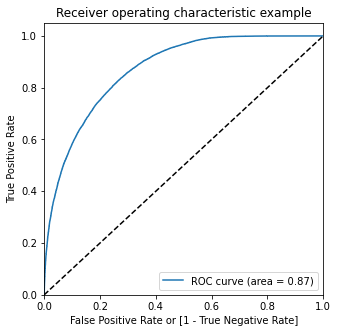

In [56]:
draw_roc(y_train_pred_final.prescribed, y_train_pred_final.prescribed_Probability)

### The ROC curve is tending towards 1 on y-axis. This means the model is good.

## Finding Optimal Cutoff Point

In [57]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.prescribed_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,prescribed,prescribed_Probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.851059,1,1,1,1,1,1,1,1,1,1,0
1,1,0.654255,1,1,1,1,1,1,1,1,0,0,0
2,0,0.063591,0,1,0,0,0,0,0,0,0,0,0
3,1,0.854330,1,1,1,1,1,1,1,1,1,1,0
4,0,0.498181,0,1,1,1,1,1,0,0,0,0,0


In [58]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.prescribed, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.452200  1.000000  0.000000
0.1   0.1  0.662514  0.993492  0.389297
0.2   0.2  0.712643  0.968282  0.501617
0.3   0.3  0.750029  0.926834  0.604079
0.4   0.4  0.771314  0.862229  0.696266
0.5   0.5  0.778629  0.772161  0.783967
0.6   0.6  0.767457  0.641909  0.871095
0.7   0.7  0.736086  0.498957  0.931831
0.8   0.8  0.689871  0.352499  0.968367
0.9   0.9  0.635800  0.208662  0.988395


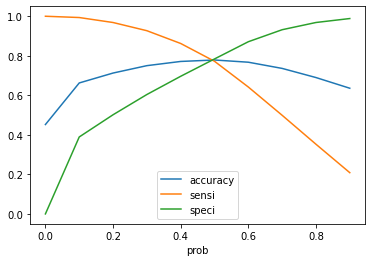

In [59]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the above curve,we can say that the optimum threshold can be 0.5

In [60]:
y_train_pred_final['final_predicted'] = y_train_pred_final.prescribed_Probability.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,prescribed,prescribed_Probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.851059,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.654255,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.063591,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.854330,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.498181,0,1,1,1,1,1,0,0,0,0,0,0


#### Accuracy

In [61]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.prescribed, y_train_pred_final.final_predicted)

0.7786285714285714

In [62]:
confusion = metrics.confusion_matrix(y_train_pred_final.prescribed, y_train_pred_final.final_predicted )
confusion

array([[30062,  8284],
       [ 7212, 24442]], dtype=int64)

In [63]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity

In [64]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7721614961774184

#### Specificity

In [65]:
# Let us calculate specificity
TN / float(TN+FP)

0.7839670369790852

In [66]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.21603296302091482


In [67]:
# positive predictive value 
print (TP / float(TP+FP))

0.7468679337529793


In [68]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8065139239147932


#### Precision

In [69]:
Precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
Precision

0.7468679337529793

#### Recall

In [70]:
Recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
Recall

0.7721614961774184

### Let us make predictions now on the test set

In [71]:
X_test[['total_representative_visits','total_sample_dropped','saving_cards_dropped', 'vouchers_dropped', 'total_seminar_as_attendee', 'total_seminar_as_speaker', 'total_prescriptions_for_indication1', 'total_prescriptions_for_indication2', 'total_prescriptions_for_indication3', 'total_patient_with_commercial_insurance_plan', 'total_patient_with_medicare_insurance_plan', 'total_patient_with_medicaid_insurance_plan', 'brand_web_impressions', 'brand_ehr_impressions', 'brand_enews_impressions', 'brand_mobile_impressions', 'brand_organic_web_visits', 'brand_paidsearch_visits', 'total_competitor_prescription', 'new_prescriptions', 'urban_population_perc_in_physician_locality', 'percent_population_with_health_insurance_in_last10q', 
         'physician_tenure', 'physician_age']] = scaler.transform(X_test[['total_representative_visits','total_sample_dropped','saving_cards_dropped', 'vouchers_dropped', 'total_seminar_as_attendee', 'total_seminar_as_speaker', 'total_prescriptions_for_indication1', 'total_prescriptions_for_indication2', 'total_prescriptions_for_indication3', 'total_patient_with_commercial_insurance_plan', 'total_patient_with_medicare_insurance_plan', 'total_patient_with_medicaid_insurance_plan', 'brand_web_impressions', 'brand_ehr_impressions', 'brand_enews_impressions', 'brand_mobile_impressions', 'brand_organic_web_visits', 'brand_paidsearch_visits', 'total_competitor_prescription', 'new_prescriptions', 'urban_population_perc_in_physician_locality', 'percent_population_with_health_insurance_in_last10q', 'physician_tenure', 'physician_age']])

In [72]:
# Retreiving features used for model building
X_test = X_test[col]
X_test.head()

,total_representative_visits,total_sample_dropped,total_prescriptions_for_indication1,total_prescriptions_for_indication3,total_patient_with_commercial_insurance_plan,brand_paidsearch_visits,physician_segment_Low,physician_speciality_other,physician_speciality_urology,year_2019,year_2020,quarter_02,quarter_03,quarter_04
22422,-0.374333,-0.366394,-0.258684,-0.384109,-0.391443,0.329297,0,0,1,0,0,0,0,1
25747,-0.374333,-0.366394,1.248065,0.587341,2.438994,0.329297,0,0,0,0,1,0,0,0
13795,-0.674569,-0.214571,-0.517656,-0.606732,-0.496274,0.329297,0,0,0,1,0,0,1,0
68724,-0.974806,-0.366394,-0.788400,-0.728164,-0.475308,0.329297,0,1,0,1,0,1,0,0
38923,2.928268,-0.290483,0.694806,0.384956,0.122229,0.329297,0,0,0,1,0,0,0,0


In [73]:
X_test_sm = sm.add_constant(X_test)

In [74]:
# make predictions on test set
y_test_pred = res.predict(X_test_sm)

In [75]:
y_test_pred[:10]

22422    0.021828
25747    0.818240
13795    0.347535
68724    0.216466
38923    0.694952
43064    0.279102
86918    0.460940
71138    0.959000
82508    0.532109
89200    0.000331
dtype: float64

In [76]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
22422,0.021828
25747,0.818240
13795,0.347535
68724,0.216466
38923,0.694952


In [77]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [78]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [79]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'prescribed_Probability'})
y_pred_final.head()

,brand_prescribed,prescribed_Probability
22422,0,0.021828
25747,0,0.818240
13795,0,0.347535
68724,0,0.216466
38923,1,0.694952


In [80]:
y_pred_final['physician_id']=physician['physician_id']

In [81]:
y_pred_final.head()

,brand_prescribed,prescribed_Probability,physician_id
22422,0,0.021828,2243
25747,0,0.818240,2575
13795,0,0.347535,1380
68724,0,0.216466,6873
38923,1,0.694952,3893


In [82]:
y_pred_final['final_predicted'] = y_pred_final.prescribed_Probability.map( lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,brand_prescribed,prescribed_Probability,physician_id,final_predicted
22422,0,0.021828,2243,0
25747,0,0.818240,2575,1
13795,0,0.347535,1380,0
68724,0,0.216466,6873,0
38923,1,0.694952,3893,1


### Let's check the metrics for test data.

#### Accuracy

In [83]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.brand_prescribed, y_pred_final.final_predicted)

0.7786666666666666

#### Confusion Matrix

In [84]:
confusion = metrics.confusion_matrix(y_pred_final.brand_prescribed, y_pred_final.final_predicted)
confusion

array([[12784,  3485],
       [ 3155, 10576]], dtype=int64)

In [85]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity

In [86]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7702279513509577

#### Specificity

In [87]:
# Let us calculate specificity
TN / float(TN+FP)

0.7857889237199582

In [88]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.2142110762800418


In [89]:
# positive predictive value 
print (TP / float(TP+FP))

0.7521513405874405


In [90]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8020578455361064


#### Precision

In [91]:
Precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
Precision

0.7521513405874405

#### Recall

In [92]:
Recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
Recall

0.7702279513509577

## Now, let's predict the prescription for desired physician Ids

In [93]:
#reading the required ids
required = pd.read_excel('C:/Users/neera/Downloads/Physician Drug Adoption Prediction test/Test/Physicians_id.xlsm')
required.head()

,physician_id
0,7
1,9
2,12
3,19
4,20


In [94]:
# extracting rows as per required ids
arr = [np.array([physician[k] == v for k, v in x.items()]).all(axis=0) for x in required.to_dict('r')]
result = physician[np.array(arr).any(axis=0)]
result.head()

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,...,physician_segment_Medium,physician_segment_Very High,physician_gender_M,physician_speciality_other,physician_speciality_urology,year_2019,year_2020,quarter_02,quarter_03,quarter_04
60,7,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
61,7,0,12,8,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
62,7,0,14,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
63,7,0,10,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
64,7,0,9,6,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0


In [95]:
# Combining rows based on 'physician_id'
# result = result.groupby('physician_id').mean()

In [96]:
# Scaling the data
result[['total_representative_visits','total_sample_dropped','saving_cards_dropped', 'vouchers_dropped', 'total_seminar_as_attendee', 'total_seminar_as_speaker', 'total_prescriptions_for_indication1', 'total_prescriptions_for_indication2', 'total_prescriptions_for_indication3', 'total_patient_with_commercial_insurance_plan', 'total_patient_with_medicare_insurance_plan', 'total_patient_with_medicaid_insurance_plan', 'brand_web_impressions', 'brand_ehr_impressions', 'brand_enews_impressions', 'brand_mobile_impressions', 'brand_organic_web_visits', 'brand_paidsearch_visits', 'total_competitor_prescription', 'new_prescriptions', 'urban_population_perc_in_physician_locality', 'percent_population_with_health_insurance_in_last10q', 
         'physician_tenure', 'physician_age']] = scaler.transform(result[['total_representative_visits','total_sample_dropped','saving_cards_dropped', 'vouchers_dropped', 'total_seminar_as_attendee', 'total_seminar_as_speaker', 'total_prescriptions_for_indication1', 'total_prescriptions_for_indication2', 'total_prescriptions_for_indication3', 'total_patient_with_commercial_insurance_plan', 'total_patient_with_medicare_insurance_plan', 'total_patient_with_medicaid_insurance_plan', 'brand_web_impressions', 'brand_ehr_impressions', 'brand_enews_impressions', 'brand_mobile_impressions', 'brand_organic_web_visits', 'brand_paidsearch_visits', 'total_competitor_prescription', 'new_prescriptions', 'urban_population_perc_in_physician_locality', 'percent_population_with_health_insurance_in_last10q', 'physician_tenure', 'physician_age']])

In [97]:
# Retreiving features required for prediction
result = result[col]
result.head()

,total_representative_visits,total_sample_dropped,total_prescriptions_for_indication1,total_prescriptions_for_indication3,total_patient_with_commercial_insurance_plan,brand_paidsearch_visits,physician_segment_Low,physician_speciality_other,physician_speciality_urology,year_2019,year_2020,quarter_02,quarter_03,quarter_04
60,-1.124924,-0.366394,-0.906115,-0.809118,-0.810767,-3.036768,0,0,0,0,0,1,0,0
61,0.676495,-0.062749,-0.906115,-0.809118,-0.810767,0.329297,0,0,0,0,0,0,1,0
62,0.976731,-0.366394,-0.682457,-0.707925,-0.705936,0.329297,0,0,0,0,0,0,0,1
63,0.376258,-0.366394,-0.600056,-0.606732,-0.705936,0.329297,0,0,0,1,0,0,0,0
64,0.226140,-0.138660,-0.623599,-0.596613,-0.674486,0.329297,0,0,0,1,0,1,0,0


In [98]:
result_sm = sm.add_constant(result)

In [99]:
# make predictions on test set
result_pred = res.predict(result_sm)
result_pred[:10]

60    0.002235
61    0.090298
62    0.184742
63    0.312077
64    0.427523
65    0.204372
66    0.472446
67    0.407678
68    0.558512
69    0.501615
dtype: float64

In [100]:
# Converting result_pred to a dataframe which is an array
result_pred_1 = pd.DataFrame(result_pred)
result_pred_1.head()

,0
60,0.002235
61,0.090298
62,0.184742
63,0.312077
64,0.427523


In [101]:
result_pred_1['physician_id']=physician['physician_id']
result_pred_1.head()

,0,physician_id
60,0.002235,7
61,0.090298,7
62,0.184742,7
63,0.312077,7
64,0.427523,7


In [102]:
result_pred_1 = result_pred_1.groupby('physician_id').mean()

In [103]:
result_pred_1[ 'Predicted drug adoption class'] = result_pred_1[0].map( lambda x: 1 if x > 0.5 else 0)
result_pred_1.head()

,0,Predicted drug adoption class
physician_id,,
7,0.316150,0
9,0.301217,0
12,0.195891,0
19,0.403465,0
20,0.303428,0


In [104]:
#final result of desired physician ids
predictions = result_pred_1[ 'Predicted drug adoption class']
predictions.sample(10)

physician_id
7340    1
492     0
2107    0
9733    0
3534    1
6868    0
9723    0
2540    0
45      0
1878    0
Name: Predicted drug adoption class, dtype: int64

In [105]:
predictions.to_csv('predictions.csv', index=False)

## Thank You